In [1]:
import math 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr


In [2]:
# !pip install --upgrade pandas
# !pip install --upgrade pandas-datareader

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = '/content/drive/MyDrive/Sentiment Group/DataSet/Combined_FAANG_binary_previous.csv'
df = pd.read_csv(path)

In [5]:
sentimentDF = df[df['symbol'] =='GOOGL']

In [6]:
sentimentDF

,symbol,message,datetime,user,message_id,Date,Time,label
1792921,GOOGL,quot tyrion himx longs anticipating goog glass...,2015-01-27 19:47:46,225937.0,31823708.0,2015-01-27,19:47:46,0
1792922,GOOGL,codenamed nova project led longtime google exe...,2015-01-21 21:58:56,372904.0,31578744.0,2015-01-21,21:58:56,1
1792923,GOOGL,amzn goog picked one margin,2017-11-10 05:17:43,800566.0,100965469.0,2017-11-10,05:17:43,0
1792924,GOOGL,goog timber,2018-09-05 16:51:14,1491743.0,136218414.0,2018-09-05,16:51:14,0
1792925,GOOGL,39 def true neither goog,2014-04-15 22:48:42,10056.0,22085177.0,2014-04-15,22:48:42,1
...,...,...,...,...,...,...,...,...
1900856,GOOGL,fb comfortable making bet amzn goog googl buy ...,2016-07-28 19:29:28,593777.0,59412425.0,2016-07-28,19:29:28,1
1900857,GOOGL,googl goog feeling really heavy close beware d...,2015-02-25 18:19:37,133683.0,33165107.0,2015-02-25,18:19:37,1
1900858,GOOGL,spy qq fb amzn aapl nflx goog djia 700pts toda...,2018-04-06 20:00:24,211324.0,119123354.0,2018-04-06,20:00:24,0
1900859,GOOGL,currently holding sq goog 2020 1500 c cl 3 15 ...,2019-01-18 03:32:54,1584419.0,151048899.0,2019-01-18,03:32:54,1


In [7]:
sentDF = df.groupby(['Date']).mean()

In [8]:
sentDF.columns

Index(['user', 'message_id', 'label'], dtype='object')

In [9]:
sentDF.drop(columns = ['user', 'message_id'] , inplace=True)

In [10]:
sentDF

,label
Date,
2009-07-10,0.0
2009-07-11,1.0
2009-07-13,0.8
2009-07-29,1.0
2009-07-30,1.0
...,...
2020-07-18,1.0
2020-07-19,1.0
2020-07-20,1.0


In [ ]:
sentDF = sentDF[sentDF.index>= "2012-01-03"]
sentDF = sentDF[sentDF.index <= '2019-12-31']
sentDF

In [43]:
stock_DF = pdr.get_data_yahoo("GOOGL",  start = "2012-01-03" , end = "2020-01-01")
stock_DF

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,334.409424,326.511505,326.796783,333.038025,7345647.0,333.038025
2012-01-04,335.460449,330.640656,332.847839,334.474487,5722272.0,334.474487
2012-01-05,332.317322,328.443451,331.396393,329.834839,6559234.0,329.834839
2012-01-06,330.330322,325.220215,329.904907,325.335327,5380414.0,325.335327
2012-01-09,323.823822,310.925934,323.573578,311.541534,11633555.0,311.541534
...,...,...,...,...,...,...
2019-12-24,1352.010010,1344.170044,1350.209961,1344.430054,673400.0,1344.430054
2019-12-26,1363.199951,1345.510010,1346.550049,1362.469971,1183100.0,1362.469971
2019-12-27,1367.050049,1353.000000,1364.000000,1354.640015,1160600.0,1354.640015


In [44]:
df_temp = pd.DataFrame()
df_temp['Close'] = stock_DF['Close']


In [45]:
df = df_temp.copy()

In [46]:
df

,Close
Date,
2012-01-03,333.038025
2012-01-04,334.474487
2012-01-05,329.834839
2012-01-06,325.335327
2012-01-09,311.541534
...,...
2019-12-24,1344.430054
2019-12-26,1362.469971
2019-12-27,1354.640015


In [47]:
df['Date'] = df.index.values
sentDF['Date'] = sentDF.index.values
df.index.name = None
sentDF.index.name = None
sentDF['Date']= pd.to_datetime(sentDF['Date'])
df_cd = pd.merge(df,sentDF, how='inner', on = 'Date')
df = df_cd.set_index('Date')

In [48]:
df

,Close,label
Date,,
2012-01-03,333.038025,1.000000
2012-01-04,334.474487,0.897351
2012-01-05,329.834839,0.285211
2012-01-06,325.335327,1.000000
2012-01-09,311.541534,0.838196
...,...,...
2019-12-24,1344.430054,0.852523
2019-12-26,1362.469971,0.895264
2019-12-27,1354.640015,0.045825


In [ ]:
plt.figure(figsize = (16,8))
plt.title('CLose Price History')
plt.plot(df['Close'])
plt.xlabel('Date' , fontsize = 16)
plt.ylabel('Close Price USD' , fontsize = 16)
plt.show()

In [49]:
df_temp

,Close
Date,
2012-01-03,333.038025
2012-01-04,334.474487
2012-01-05,329.834839
2012-01-06,325.335327
2012-01-09,311.541534
...,...
2019-12-24,1344.430054
2019-12-26,1362.469971
2019-12-27,1354.640015


In [20]:
data = df_temp
dataset = data.values 
training_data_len = math.ceil(len(dataset) * 0.8)

In [ ]:
dataset

In [22]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

In [23]:
scaled_data

array([[0.04916868],
       [0.05049546],
       [0.04621007],
       ...,
       [0.99276789],
       [0.97897779],
       [0.97868228]])

In [50]:
df['Close'] = scaled_data

In [51]:
df

,Close,label
Date,,
2012-01-03,0.049169,1.000000
2012-01-04,0.050495,0.897351
2012-01-05,0.046210,0.285211
2012-01-06,0.042054,1.000000
2012-01-09,0.029314,0.838196
...,...,...
2019-12-24,0.983337,0.852523
2019-12-26,1.000000,0.895264
2019-12-27,0.992768,0.045825


In [52]:
scaled_data = np.array(df)

In [ ]:
scaled_data

In [ ]:
train_data = scaled_data[: training_data_len,] 
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60: i ,])
  y_train.append(train_data[i,0])
  if(i <= 60) : 
    print(x_train)
    print(y_train)

In [29]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [30]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 2))
x_train.shape

(1550, 60, 2)

In [89]:
x_train

array([[[0.04916868, 1.        ],
        [0.05049546, 0.89735099],
        [0.04621007, 0.28521127],
        ...,
        [0.04173514, 1.        ],
        [0.04066726, 0.93548387],
        [0.04470765, 0.65027322]],

       [[0.05049546, 0.89735099],
        [0.04621007, 0.28521127],
        [0.04205411, 1.        ],
        ...,
        [0.04066726, 0.93548387],
        [0.04470765, 0.65027322],
        [0.04130985, 0.38839286]],

       [[0.04621007, 0.28521127],
        [0.04205411, 1.        ],
        [0.02931352, 0.83819629],
        ...,
        [0.04470765, 0.65027322],
        [0.04130985, 0.38839286],
        [0.03799526, 0.        ]],

       ...,

       [[0.77374356, 0.        ],
        [0.76119124, 0.3851618 ],
        [0.73116348, 0.        ],
        ...,
        [0.72952861, 0.        ],
        [0.7428014 , 1.        ],
        [0.73476572, 0.        ]],

       [[0.76119124, 0.3851618 ],
        [0.73116348, 0.        ],
        [0.74292148, 1.        ],
        .

In [32]:
y_train

array([0.04130985, 0.03799526, 0.04062103, ..., 0.74460247, 0.7441314 ,
       0.74286601])

In [33]:
from keras.models import Sequential

model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape = (x_train.shape[1],2)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [34]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [35]:
model.fit(x_train,y_train,batch_size = 1, epochs = 1)

1550/1550 [==============================] - 47s 28ms/step - loss: 0.0015


In [54]:
scaled_data

array([[0.04916868, 1.        ],
       [0.05049546, 0.89735099],
       [0.04621007, 0.28521127],
       ...,
       [0.99276789, 0.04582485],
       [0.97897779, 0.80062064],
       [0.97868228, 0.96886792]])

In [36]:
test_data = scaled_data[training_data_len - 60 : ,]

x_test = []
y_test = dataset[training_data_len:,]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i])

In [37]:
x_test = np.array(x_test)

In [38]:
x_test

array([[[0.74292148, 1.        ],
        [0.7527306 , 1.        ],
        [0.75840181, 0.74831693],
        ...,
        [0.74460247, 1.        ],
        [0.7441314 , 0.71905697],
        [0.74286601, 0.95974576]],

       [[0.7527306 , 1.        ],
        [0.75840181, 0.74831693],
        [0.77146218, 0.19325482],
        ...,
        [0.7441314 , 0.71905697],
        [0.74286601, 0.95974576],
        [0.72807842, 0.28100607]],

       [[0.75840181, 0.74831693],
        [0.77146218, 0.19325482],
        [0.78470724, 0.45638521],
        ...,
        [0.74286601, 0.95974576],
        [0.72807842, 0.28100607],
        [0.73676072, 0.54888889]],

       ...,

       [[0.82954109, 0.        ],
        [0.84017227, 1.        ],
        [0.86005829, 1.        ],
        ...,
        [0.98906406, 0.79225062],
        [0.98333749, 0.85252264],
        [1.        , 0.89526351]],

       [[0.84017227, 1.        ],
        [0.86005829, 1.        ],
        [0.85755525, 0.67164179],
        .

In [39]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],2))

In [40]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [41]:
#Test the accuracy 
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

10.891190713910914

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


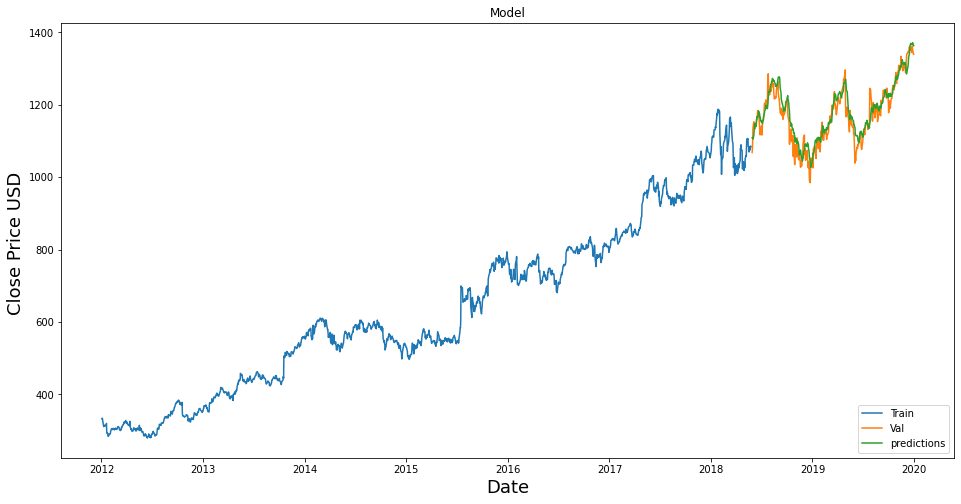

In [55]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid["predictions"] = predictions
plt.figure(figsize = (16,8))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ", fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show()

In [56]:
valid

,Close,predictions
Date,,
2018-05-29,1068.069946,1108.570557
2018-05-30,1077.469971,1107.426147
2018-05-31,1100.000000,1106.203857
2018-06-01,1135.000000,1105.393555
2018-06-04,1153.040039,1114.134033
...,...,...
2019-12-24,1344.430054,1366.312134
2019-12-26,1362.469971,1367.741943
2019-12-27,1354.640015,1371.348511


In [57]:
df_temp.iloc[1609]

Close    1084.079956
Name: 2018-05-25 00:00:00, dtype: float64

In [59]:
scaled_data

array([[0.04916868, 1.        ],
       [0.05049546, 0.89735099],
       [0.04621007, 0.28521127],
       ...,
       [0.99276789, 0.04582485],
       [0.97897779, 0.80062064],
       [0.97868228, 0.96886792]])

In [60]:
df

,Close,label
Date,,
2012-01-03,0.049169,1.000000
2012-01-04,0.050495,0.897351
2012-01-05,0.046210,0.285211
2012-01-06,0.042054,1.000000
2012-01-09,0.029314,0.838196
...,...,...
2019-12-24,0.983337,0.852523
2019-12-26,1.000000,0.895264
2019-12-27,0.992768,0.045825


In [ ]:
# from re import X
# app_quote = pdr.get_data_yahoo("GOOGL",  start = "2012-01-03" , end = "2018-05-26")

# sentiment_quote = df[df.index <= "2018-05-26"]

# new_sentiment = sentiment_quote['label']

# last_60_days_sentiment = new_sentiment[-60:]

# # new_df= app_quote.filter(['Close'])
# # last_60_days= new_df[-60:].values
# # last_60_scaled= scaler.fit_transform(last_60_days)

# # last_60_days_sentiment['Close'] = last_60_scaled 

# X_test=[]

# X_test.append(last_60_days_sentiment)
# # X_test.append(last_60_scaled)
# X_test=np.array(X_test)
# print(X_test.shape)
# X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],2))

# pred=model.predict(X_test)
# pred=scaler.inverse_transform(pred)
# print(pred)

In [61]:
from datetime import date, timedelta

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)    

In [71]:
from re import X

predictedDF = pd.DataFrame(columns = ["predicted Close", "Date"])


In [72]:
start_date = date(2019, 1, 1)
end_date = date(2019, 12, 31)
for single_date in daterange(start_date, end_date):
    day_date = single_date.strftime("%Y-%m-%d")
    sentiment_quote = df[df.index < day_date]
    new_sentiment = sentiment_quote

    last_60_days_sentiment = new_sentiment[-60:]
    X_test=[]

    X_test.append(last_60_days_sentiment)
    
    X_test=np.array(X_test)
    
    

    # print(X_test.shape)
    X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],2))
    
    pred=model.predict(X_test)
    
    pred=scaler.inverse_transform(pred)
    value = pred.item()
    df2 = {"predicted Close" : value , "Date": day_date}
    predictedDF = predictedDF.append(df2, ignore_index = True)

    # print(pred)




In [73]:
predictedDF

,predicted Close,Date
0,1055.318604,2019-01-01
1,1055.318604,2019-01-02
2,1066.241699,2019-01-03
3,1064.774414,2019-01-04
4,1071.699463,2019-01-05
...,...,...
359,1367.741943,2019-12-26
360,1371.348511,2019-12-27
361,1364.919312,2019-12-28
362,1364.919312,2019-12-29


In [65]:
temp_df2 = df_temp.copy()
temp_df2['Date'] = temp_df2.index
temp_df2.index.name = None
temp_df2['Date']= pd.to_datetime(temp_df2['Date'])
predictedDF['Date']= pd.to_datetime(predictedDF['Date'])

df_predicted = pd.merge(temp_df2,predictedDF, how='inner', on = 'Date')
df_predicted

,Close,Date,predicted Close
0,1054.680054,2019-01-02,1055.318604
1,1025.469971,2019-01-03,1066.241699
2,1078.069946,2019-01-04,1064.774414
3,1075.920044,2019-01-07,1071.699463
4,1085.369995,2019-01-08,1077.540161
...,...,...,...
246,1350.630005,2019-12-23,1366.387573
247,1344.430054,2019-12-24,1366.312012
248,1362.469971,2019-12-26,1367.741943
249,1354.640015,2019-12-27,1371.348511


In [66]:
df_predicted = df_predicted.set_index('Date')


In [67]:
df_predicted

,Close,predicted Close
Date,,
2019-01-02,1054.680054,1055.318604
2019-01-03,1025.469971,1066.241699
2019-01-04,1078.069946,1064.774414
2019-01-07,1075.920044,1071.699463
2019-01-08,1085.369995,1077.540161
...,...,...
2019-12-23,1350.630005,1366.387573
2019-12-24,1344.430054,1366.312012
2019-12-26,1362.469971,1367.741943


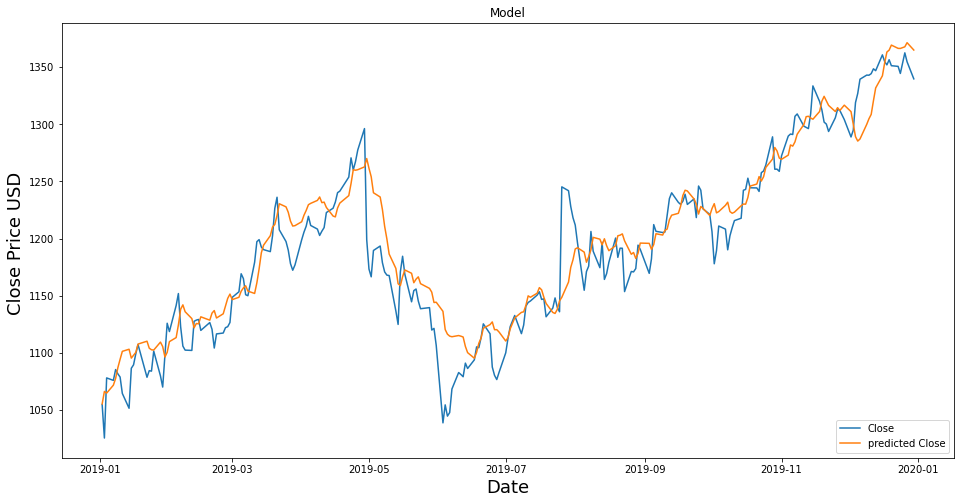

In [68]:

# valid["predictions"] = predictions
plt.figure(figsize = (16,8))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ", fontsize=18)
plt.plot(df_predicted['Close'])
plt.plot(df_predicted[['predicted Close']])
plt.legend(['Close', 'predicted Close'], loc='lower right')
plt.show()

In [75]:
!pip install backtrader

     |████████████████████████████████| 410 kB 5.0 MB/s 


In [85]:
import backtrader as bt
import backtrader.indicators as btind
import datetime
import os.path
import sys



class Strat(bt.Strategy):
    params = (
        ('period', 15),
        ('printlog', True),
    )

    def log(self, txt, dt=None, doprint=False):
        ''' Logging function for this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.datas[0].datetime.date(0)
            print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        self.predicted = self.datas[0].open

        # Keep track of pending orders
        self.order = None
        self.buyprice = None
        self.buycomm = None  
        self.date = self.data.datetime

        
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return
        
        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))
                self.buyprice = order.executed.price
                # self.buycomm = order.executed.comm
                self.buycomm = 0
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))
                
            self.bar_executed = len(self)     
            
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')
            
        # Write down: no pending order
        self.order = None
        
    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))
    
    ### Main Strat ###
    def next(self):
        # log closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])
        
        date = bt.num2date(self.date[0]).date()
        # prev_sentiment = self.sentiment
        # if date in date_sentiment:
        #     self.sentiment = date_sentiment[date]
        
        # Check if an order is pending. if yes, we cannot send a 2nd one
        if self.order:
            return
        # print(self.sentiment)

       
        # buy if current close more than sma AND sentiment increased by >= 0.5
        # if self.dataclose[0] > self.sma[0] and self.sentiment - prev_sentiment >= 0.5:
        if abs(self.predicted[0] - self.dataclose[-1]) > 0.005*self.dataclose[-1]:
                # print("H", self.predicted[0], " ", self.dataclose[-1])
                self.log('BUY CREATE, %.2f' % self.dataclose[0])
                self.order = self.buy()     
        else: 
              self.log('SELL CREATE, %.2f' % self.dataclose[0])
              self.order = self.sell()
   

    def stop(self):
        self.log('(MA Period %2d) Ending Value %.2f' %
                 (self.params.period, self.broker.getvalue()), doprint=True)

In [86]:
df_predicted.rename(columns = {'Close':'close', 'predicted Close':'open'}, inplace = True)


In [87]:
df_predicted

,close,open
Date,,
2019-01-02,1054.680054,1055.318604
2019-01-03,1025.469971,1066.241699
2019-01-04,1078.069946,1064.774414
2019-01-07,1075.920044,1071.699463
2019-01-08,1085.369995,1077.540161
...,...,...
2019-12-23,1350.630005,1366.387573
2019-12-24,1344.430054,1366.312012
2019-12-26,1362.469971,1367.741943


In [88]:
if __name__ == '__main__':
    cerebro = bt.Cerebro()
    
    # Strategy
    cerebro.addstrategy(Strat)

    # Data Feed

    data = bt.feeds.PandasData(dataname=df_predicted)

    cerebro.adddata(data)

    cerebro.broker.setcash(100000.0)
    cerebro.addsizer(bt.sizers.FixedSize, stake=10)
    cerebro.broker.setcommission(commission=0)
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.run()
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
  

Starting Portfolio Value: 100000.00
2019-01-02, Close, 1054.68
2019-01-02, BUY CREATE, 1054.68
2019-01-03, BUY EXECUTED, Price: 1066.24, Cost: 10662.42, Comm 0.00
2019-01-03, Close, 1025.47
2019-01-03, BUY CREATE, 1025.47
2019-01-04, BUY EXECUTED, Price: 1064.77, Cost: 10647.74, Comm 0.00
2019-01-04, Close, 1078.07
2019-01-04, BUY CREATE, 1078.07
2019-01-07, BUY EXECUTED, Price: 1071.70, Cost: 10716.99, Comm 0.00
2019-01-07, Close, 1075.92
2019-01-07, BUY CREATE, 1075.92
2019-01-08, BUY EXECUTED, Price: 1077.54, Cost: 10775.40, Comm 0.00
2019-01-08, Close, 1085.37
2019-01-08, SELL CREATE, 1085.37
2019-01-09, SELL EXECUTED, Price: 1086.98, Cost: 10700.64, Comm 0.00
2019-01-09, Close, 1081.65
2019-01-09, SELL CREATE, 1081.65
2019-01-10, SELL EXECUTED, Price: 1094.33, Cost: 10700.64, Comm 0.00
2019-01-10, Close, 1078.83
2019-01-10, BUY CREATE, 1078.83
2019-01-11, BUY EXECUTED, Price: 1101.30, Cost: 11013.05, Comm 0.00
2019-01-11, Close, 1064.47
2019-01-11, BUY CREATE, 1064.47
2019-01-14, 

In [ ]:
def backtrade(df_predicted):
    cerebro = bt.Cerebro()
    
    # Strategy
    cerebro.addstrategy(Strat)

    # Data Feed

    data = bt.feeds.PandasData(dataname=df_predicted)

    cerebro.adddata(data)

    cerebro.broker.setcash(100000.0)
    cerebro.addsizer(bt.sizers.FixedSize, stake=10)
    cerebro.broker.setcommission(commission=0)
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.run()
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
  